In [66]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

**Excerise 16.1.**  Give an example in which prediction-based optimization fails.

**Answer:** Prediction-based optimization on ly look at the mean, which means that there is a risk that it only samples points near other points which can result in being stuck in a local minimum.

**Excerise 16.2.**  What is the main difference between lower confidence bound exploration and error-based exploration in the context of optimization?

**Answer:** Error-based exploration is based on maximizing the standard deviation of the prediction, while lower confidence bound exploration is based on minimizing the difference between the mean and the standard deviation, up to a constant.

**Excerise 16.3.**  We have a function $f(x) = \frac{(x-2)^2}{40} - 0.5$ with $x \in [-5, 5]$, and we have evaluation points at -1 and 1. Assume we use a Gaussian process surrogate model with a zero-mean function, and a squared exponential kernel $\exp(-r^2/2)$, where $r$ is the Euclidean distance between two points. Which value for $x$ would we evaluate next if we were maximizing probability of improvement? Which value for $x$ would we evaluate next if we were maximizing expected improvement?

**Answer:** 

In [67]:
def func(x):
    return ((x-2)**2)/(40) - 0.5

x = [-1,1]
y = [func(x[0]),func(x[1])]
X = np.linspace(-5,5,1000)
Y = [func(x) for x in X]

def squared_exponential_kernel(x1, x2):
    r = np.linalg.norm(x1 - x2)
    return np.exp(-0.5 * r**2)

def predict_gp(x, X, y, inflation=1e-6):
    y = np.array(y)
    K = np.array([[squared_exponential_kernel(xi, xj) for xj in x] for xi in x])
    K_inv = np.linalg.inv(K + inflation * np.eye(len(x)))
    k1 = np.array([[squared_exponential_kernel(xi, xj) for xj in x] for xi in X])
    k2 = np.array([[squared_exponential_kernel(xi, xj) for xj in X] for xi in x])
    k3 = np.array([[squared_exponential_kernel(xi, xj) for xj in X] for xi in X])
    mu =  k1 @ K_inv @ y
    sigma = k3 - k1 @ K_inv @ k2
    return mu, np.diag(sigma)

In [68]:
mu, sigma = predict_gp(x, X, y)

In [74]:
min(sigma)

1.5825534089408677e-05

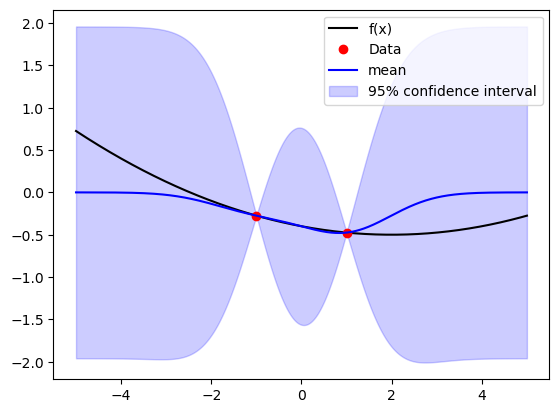

In [69]:
plt.plot(X,Y, color='black', label='f(x)')
plt.plot(x,y,'ro', label='Data')
plt.plot(X,mu, color='blue', label='mean')
plt.fill_between(X, mu - 1.96*np.sqrt(sigma), mu + 1.96*np.sqrt(sigma), color='blue', alpha=0.2, label=r'95% confidence interval')
plt.legend()
plt.show()

In [79]:
def prob_of_improvement(mu, sigma, y_min):
    z = (y_min-mu) / sigma
    return norm.cdf(z)

def expected_improvement(mu, sigma, y_min):
    z = (y_min-mu) / sigma
    return (y_min-mu) * norm.cdf(z) + sigma**2 * norm.pdf(z)

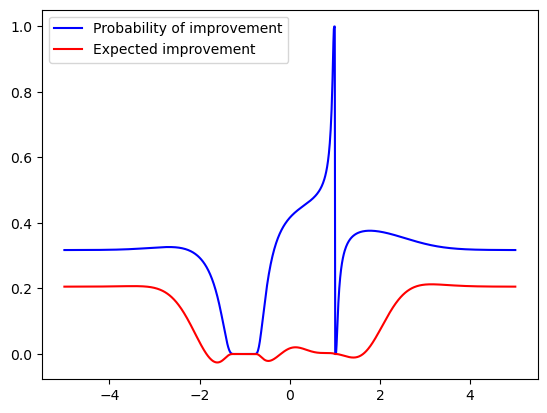

In [80]:
plt.plot(X, prob_of_improvement(mu, sigma, np.min(y)), color='blue', label='Probability of improvement')
plt.plot(X, expected_improvement(mu, sigma, np.min(y)), color='red', label='Expected improvement')
plt.legend()
plt.show()

In [82]:
max_index_prob_of_improvement = np.argmax(prob_of_improvement(mu, sigma, np.min(y)))
max_index_expected_improvement = np.argmax(expected_improvement(mu, sigma, np.min(y)))

max_prob_of_improvement = X[max_index_prob_of_improvement]
max_expected_improvement = X[max_index_expected_improvement]

print('Max probability of improvement: ', max_prob_of_improvement)
print('Max expected improvement: ', max_expected_improvement)

Max probability of improvement:  0.9959959959959956
Max expected improvement:  3.138138138138139
